In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec

plt.rcParams['font.serif'] = ['Hack']


# Диффузия

Хотим 3D нумпи-массив, чтобы он эффективно работал. Количество частиц, количество шагов и (x, y). Найти зависимость среднего радиуса от времени. Здесь будет чисто функция расчета и его входные параметры.

In [2]:
dh = 1000
N = 10000
steps = 10000

def diffusion(dh, N, steps):
    """
    dh - максимальный шаг частицы
    N - количество частиц
    steps - количество шагов
    """
    
    trajectories = np.zeros((N, steps, 2))
    random_steps = np.random.normal(0, dh, (N, steps-1, 2))
    trajectories[:, 1:, :] = np.cumsum(random_steps, axis=1)

    return trajectories

# Функция для отрисовки

Закомментированные версии строят либо просто конечное распределение частиц, либо гифку.

In [3]:
trajectories = diffusion(dh, N, steps)

# def draw(trajectories, dh, dt, N, steps):
#     fig, ax = plt.subplots(figsize=(12, 8))
#     final_positions = trajectories[:, -1, :]
#     scatter = ax.scatter(final_positions[:, 0], final_positions[:, 1], s=5, alpha=0.6, c='blue')
    
#     ax.set_xlabel('Координата X', fontsize=12)
#     ax.set_ylabel('Координата Y', fontsize=12)
#     ax.grid(True, alpha=0.3)
#     ax.set_title(f'Финальное распределение {N} частиц после {steps} шагов\n(dh={dh}, dt={dt})')
    
#     ax.axis('equal')
    
#     plt.tight_layout()
#     plt.show()

# draw(trajectories, dh, dt, N, steps)

# def draw_animation(trajectories, steps, frame_step, filename='diffusion.gif'):
#     fig, ax1, ax2, ax3 = plt.subplots(figsize=(10, 8))
#     ax1.axis('equal')
#     ax1.grid(True, alpha=0.3)
    
#     lim = np.abs(trajectories).max()
#     ax1.set_xlim(-lim, lim)
#     ax1.set_ylim(-lim, lim)
    
#     scatter = ax1.scatter([], [], s=1, alpha=0.6, c='blue')
    
#     def update(frame):
#         scatter.set_offsets(trajectories[:, frame, :])
#         ax1.set_title(f'Шаг {frame}')
#         return scatter,
    
#     anim = FuncAnimation(fig, update, frames=range(0, steps, frame_step), blit=True, repeat=False)
#     anim.save(filename, writer='pillow', fps=20)
#     plt.close(fig)
#     print(f"Анимация сохранена как {filename}")

# draw_animation(trajectories, steps=steps, frame_step=200, filename='diffusion.gif')

def draw_animation(trajectories, steps, *, frame_step=200, filename='diffusion_with_hist.gif', bins=50):

    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.1, wspace=0.1)

    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[0, 0])  
    ax3 = fig.add_subplot(gs[1, 1])  

    for ax in [ax1, ax2, ax3]:
        ax.grid(True, alpha=0.3)

    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelleft=False)

    lim = np.abs(trajectories).max()
    margin = 0.05 * lim
    lim += margin

    scatter = ax1.scatter([], [], s=1, alpha=0.6, c='xkcd:eggplant')
    ax2.set_xlim(-lim, lim)
    ax3.set_ylim(-lim, lim)
    ax1.set_xlim(-lim, lim)
    ax1.set_ylim(-lim, lim)

    def update(frame):
        x = trajectories[:, frame, 0]
        y = trajectories[:, frame, 1]

        scatter.set_offsets(np.column_stack([x, y]))
        ax2.clear()
        ax3.clear()

        ax2.hist(x, bins=bins, color='blue', alpha=0.7)
        ax3.hist(y, bins=bins, color='red', alpha=0.7, orientation='horizontal')

        ax2.set_xlim(-lim, lim)
        ax3.set_ylim(-lim, lim)
        ax2.tick_params(labelbottom=False)
        ax3.tick_params(labelleft=False)
        ax2.grid(True, alpha=0.3)
        ax3.grid(True, alpha=0.3)

        ax1.set_title(f'Шаг {frame}')
        return scatter,

    anim = FuncAnimation(fig, update, frames=range(0, steps, frame_step), blit=False, repeat=False)
    anim.save(filename, writer='pillow', fps=10)
    plt.close(fig)
    print(f"Анимация с гистограммами сохранена как {filename}")

draw_animation(trajectories, steps, frame_step=200, filename='diffusion_with_hist.gif', bins=60)

Анимация с гистограммами сохранена как diffusion_with_hist.gif


# Функция с гистограммами

In [4]:
trajectories = diffusion(dh, N, steps)
def draw_animation_full(trajectories, steps, *, frame_step=200, filename='diffusion_with_hist.gif', bins=50):

    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.1, wspace=0.1)

    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[0, 0])  
    ax3 = fig.add_subplot(gs[1, 1])  

    for ax in [ax1, ax2, ax3]:
        ax.grid(True, alpha=0.3)

    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelleft=False)

    lim = np.abs(trajectories).max()
    margin = 0.05 * lim
    lim += margin

    scatter = ax1.scatter([], [], s=1, alpha=0.6, c='xkcd:eggplant')
    ax2.set_xlim(-lim, lim)
    ax3.set_ylim(-lim, lim)
    ax1.set_xlim(-lim, lim)
    ax1.set_ylim(-lim, lim)

    def update(frame):
        x = trajectories[:, frame, 0]
        y = trajectories[:, frame, 1]

        scatter.set_offsets(np.column_stack([x, y]))

        ax2.clear()
        ax3.clear()

        ax2.hist(x, bins=bins, color='blue', alpha=0.7)
        ax3.hist(y, bins=bins, color='red', alpha=0.7, orientation='horizontal')

        ax2.set_xlim(-lim, lim)
        ax3.set_ylim(-lim, lim)
        ax2.tick_params(labelbottom=False)
        ax3.tick_params(labelleft=False)
        ax2.grid(True, alpha=0.3)
        ax3.grid(True, alpha=0.3)

        ax1.set_title(f'Шаг {frame}')
        return scatter,

    anim = FuncAnimation(fig, update, frames=range(0, steps, frame_step), blit=False, repeat=False)
    anim.save(filename, writer='pillow', fps=10)
    plt.close(fig)
    print(f"Анимация с гистограммами сохранена как {filename}")

draw_animation_full(trajectories, steps, frame_step=200, filename='diffusion_with_hist.gif', bins=60)


Анимация с гистограммами сохранена как diffusion_with_hist.gif


# Зависимость расстояния от шагов. Распределение Рэлея.
Получилась зависимость как квадратный корень. Распределение Рэлея есть распределение Максвелла.

/tmp/ipykernel_153979/1783255645.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(r_smooth, rayleigh_pdf, 'r--', color="red", lw=2, label='Теория (Рэлея)')


Распределение радиуса сохранено как distribution.png
Угол наклона кривой: 0.5005495172271688
График среднего радиуса сохранен как diffusion_radius.png


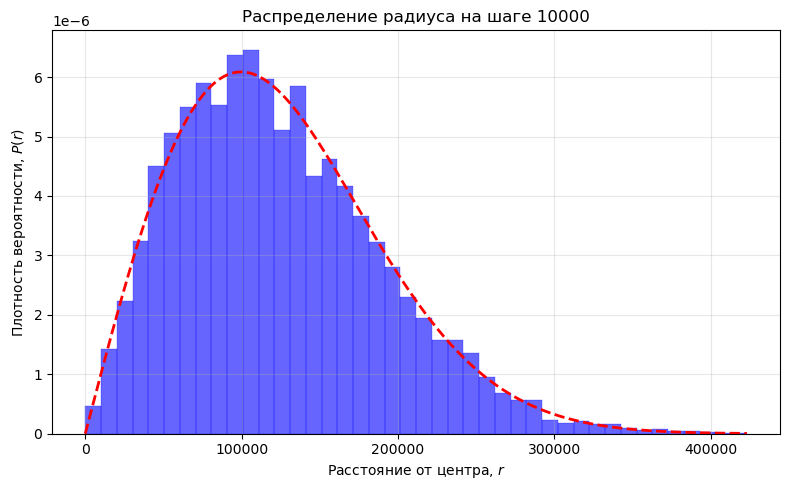

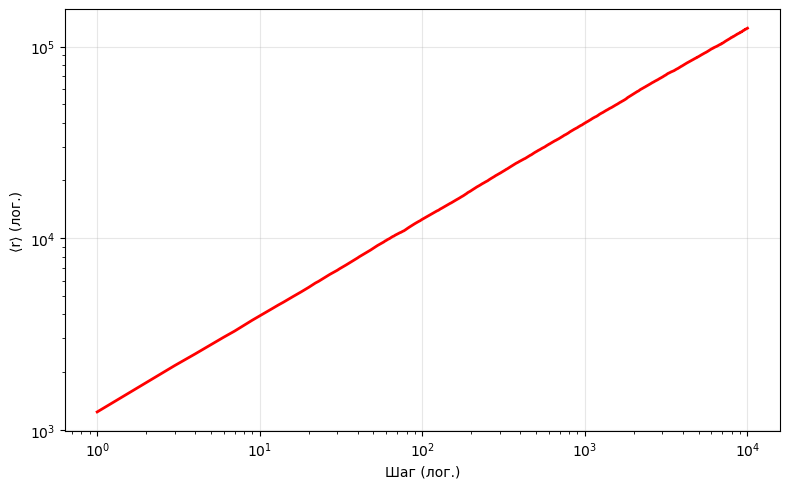

In [5]:
trajectories = diffusion(dh, N, steps)
def diffusion_radius(trajectories, steps, filename="diffusion_radius.png"):

    distances = np.sqrt(trajectories[:, :, 0]**2 + trajectories[:, :, 1]**2)
    mean_dist = distances.mean(axis=0)  # (steps,)

    t = np.arange(1, steps)
    r = mean_dist[1:]

    fig, ax = plt.subplots(figsize=(8, 5))
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Шаг (лог.)')
    ax.set_ylabel('⟨r⟩ (лог.)')
    ax.grid(True, alpha=0.3)

    ax.plot(t, r, 'r-', linewidth=2)
    plt.tight_layout()
    plt.savefig(filename, dpi=150)

    r1 = mean_dist[1]
    r2 = mean_dist[steps - 1]

    if r1 <= 0 or r2 <= 0: pass

    log_t1, log_t2 = np.log(1), np.log(steps-1)
    log_r1, log_r2 = np.log(r1), np.log(r2)


    print(f"Угол наклона кривой: {(log_r2 - log_r1) / (log_t2 - log_t1)}")
    print(f"График среднего радиуса сохранен как {filename}")

def radius_distribution(trajectories, steps, bins=100, filename="distribution.png"):
    
    x = trajectories[:, steps, 0]
    y = trajectories[:, steps, 1]
    r = np.sqrt(x**2 + y**2)

    sigma = np.sqrt(np.mean(x**2 + y**2) / 2)

    fig, ax = plt.subplots(figsize=(8, 5))

    ax.hist(r, bins=bins, density=True, alpha=0.6, color='blue', edgecolor='blue', linewidth=0.3)

    if sigma > 0:
        r_smooth = np.linspace(0, r.max(), 300)
        rayleigh_pdf = (r_smooth / (sigma**2)) * np.exp(-r_smooth**2 / (2 * sigma**2))
        ax.plot(r_smooth, rayleigh_pdf, 'r--', color="red", lw=2, label='Теория (Рэлея)')

    ax.set_xlabel('Расстояние от центра, $r$')
    ax.set_ylabel('Плотность вероятности, $P(r)$')
    ax.set_title(f'Распределение радиуса на шаге {10000}')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(filename, dpi=150)
    print(f"Распределение радиуса сохранено как {filename}")



radius_distribution(trajectories, -1, 2 * int((N ** (1/3))), filename="distribution.png")
diffusion_radius(trajectories, steps, filename="diffusion_radius.png")

Угол наклона кривой: 0.5826776148667875
График среднего радиуса сохранен как diffusion_radius_gravity.png
Анимация с гистограммами сохранена как diffusion_with_hist_gravity.gif


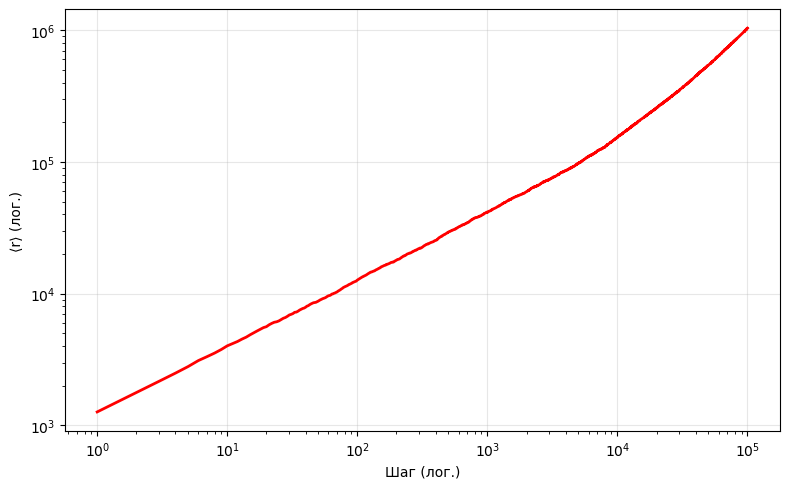

In [17]:
dh = 1000
N = 1000
steps = 100000
g = 10.0

def diffusion_gravity(dh, N, steps, g=0.0):
    """
    dh - максимальный шаг частицы
    N - количество частиц
    steps - количество шагов
    """
    
    trajectories = np.zeros((N, steps, 2))
    random_steps = np.random.normal(0, dh, (N, steps-1, 2))

    drift = np.zeros((N, steps - 1, 2))
    drift[:, :, 1] = -g
    trajectories[:, 1:, :] = np.cumsum(random_steps + drift, axis=1)

    return trajectories

trajectories = diffusion_gravity(dh, N, steps, g)

diffusion_radius(trajectories, steps, filename="diffusion_radius_gravity.png")
draw_animation_full(trajectories, steps, frame_step=200, filename='diffusion_with_hist_gravity.gif', bins=60)